<a href="https://colab.research.google.com/github/JuanDlog/Python_Data_Science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción


In [35]:
import pandas as pd

In [36]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
datos = pd.read_json(url)

#🔧 Transformación

In [37]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [38]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [39]:
import numpy as np

datos['Churn'] = datos['Churn'].replace('', np.nan)
datos.dropna(subset=['Churn'], inplace=True)
datos.reset_index(drop=True, inplace=True)

In [40]:
customer_datos = pd.json_normalize(datos['customer'])
phone_datos = pd.json_normalize(datos['phone'])
internet_datos = pd.json_normalize(datos['internet'])
account_datos = pd.json_normalize(datos['account'])

# Add customerID to each of the normalized dataframes
customer_datos['customerID'] = datos['customerID']
phone_datos['customerID'] = datos['customerID']
internet_datos['customerID'] = datos['customerID']
account_datos['customerID'] = datos['customerID']

customer_datos.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,customerID
0,Female,0,Yes,Yes,9,0002-ORFBO
1,Male,0,No,No,9,0003-MKNFE
2,Male,0,No,No,4,0004-TLHLJ
3,Male,1,Yes,No,13,0011-IGKFF
4,Female,1,Yes,No,3,0013-EXCHZ


In [41]:
internet_datos

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,customerID
0,DSL,No,Yes,No,Yes,Yes,No,0002-ORFBO
1,DSL,No,No,No,No,No,Yes,0003-MKNFE
2,Fiber optic,No,No,Yes,No,No,No,0004-TLHLJ
3,Fiber optic,No,Yes,Yes,No,Yes,Yes,0011-IGKFF
4,Fiber optic,No,No,No,Yes,Yes,No,0013-EXCHZ
...,...,...,...,...,...,...,...,...
7038,DSL,Yes,No,No,Yes,No,No,9987-LUTYD
7039,Fiber optic,No,No,No,No,No,Yes,9992-RRAMN
7040,DSL,No,Yes,No,No,No,No,9992-UJOEL
7041,DSL,Yes,No,Yes,Yes,No,Yes,9993-LHIEB


In [42]:
account_datos.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID
0,One year,Yes,Mailed check,65.6,593.3,0002-ORFBO
1,Month-to-month,No,Mailed check,59.9,542.4,0003-MKNFE
2,Month-to-month,Yes,Electronic check,73.9,280.85,0004-TLHLJ
3,Month-to-month,Yes,Electronic check,98.0,1237.85,0011-IGKFF
4,Month-to-month,Yes,Mailed check,83.9,267.4,0013-EXCHZ


In [43]:
len(datos.customerID.unique())


7043

In [44]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7043 non-null   object
 3   phone       7043 non-null   object
 4   internet    7043 non-null   object
 5   account     7043 non-null   object
dtypes: object(6)
memory usage: 330.3+ KB


In [45]:
account_datos.isnull().sum()

,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0
customerID,0


In [46]:
datos.customerID.duplicated().sum()

np.int64(0)

In [47]:
account_datos['Cuentas_Diarias'] = account_datos['Charges.Monthly'] /30

In [48]:
account_datos.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Cuentas_Diarias
0,One year,Yes,Mailed check,65.6,593.3,0002-ORFBO,2.186667
1,Month-to-month,No,Mailed check,59.9,542.4,0003-MKNFE,1.996667
2,Month-to-month,Yes,Electronic check,73.9,280.85,0004-TLHLJ,2.463333
3,Month-to-month,Yes,Electronic check,98.0,1237.85,0011-IGKFF,3.266667
4,Month-to-month,Yes,Mailed check,83.9,267.4,0013-EXCHZ,2.796667


In [49]:
datos['Churn'] = datos['Churn'].replace({'Yes': 1, 'No': 0})
customer_datos['Partner'] = customer_datos['Partner'].replace({'Yes': 1, 'No': 0})
customer_datos['Dependents'] = customer_datos['Dependents'].replace({'Yes': 1, 'No': 0})
phone_datos['PhoneService'] = phone_datos['PhoneService'].replace({'Yes': 1, 'No': 0})
phone_datos['MultipleLines'] = phone_datos['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 2})
internet_datos['OnlineSecurity'] = internet_datos['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
internet_datos['OnlineBackup'] = internet_datos['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
internet_datos['DeviceProtection'] = internet_datos['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
internet_datos['TechSupport'] = internet_datos['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
internet_datos['StreamingTV'] = internet_datos['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
internet_datos['StreamingMovies'] = internet_datos['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
account_datos['PaperlessBilling'] = account_datos['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-49-3421172930.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['Churn'] = datos['Churn'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-49-3421172930.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_datos['Partner'] = customer_datos['Partner'].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-49-3421172930.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

In [50]:
customer_datos['customerID'] = datos['customerID']
phone_datos['customerID'] = datos['customerID']
internet_datos['customerID'] = datos['customerID']
account_datos['customerID'] = datos['customerID']


In [51]:
df

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,One year,1.0,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,Month-to-month,0.0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,Month-to-month,1.0,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,Month-to-month,1.0,Mailed check,83.9,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
customer_datos

,gender,SeniorCitizen,Partner,Dependents,tenure,customerID
0,Female,0,1,1,9,0002-ORFBO
1,Male,0,0,0,9,0003-MKNFE
2,Male,0,0,0,4,0004-TLHLJ
3,Male,1,1,0,13,0011-IGKFF
4,Female,1,1,0,3,0013-EXCHZ
...,...,...,...,...,...,...
7038,Female,0,0,0,13,9987-LUTYD
7039,Male,0,1,0,22,9992-RRAMN
7040,Male,0,0,0,2,9992-UJOEL
7041,Male,0,1,1,67,9993-LHIEB


In [53]:
phone_datos

,PhoneService,MultipleLines,customerID
0,1,0,0002-ORFBO
1,1,1,0003-MKNFE
2,1,0,0004-TLHLJ
3,1,0,0011-IGKFF
4,1,0,0013-EXCHZ
...,...,...,...
7038,1,0,9987-LUTYD
7039,1,1,9992-RRAMN
7040,1,0,9992-UJOEL
7041,1,0,9993-LHIEB


In [54]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,1,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,1,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7038,9987-LUTYD,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7039,9992-RRAMN,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7040,9992-UJOEL,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7041,9993-LHIEB,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [55]:
# Empezamos con la tabla principal
df = datos.copy()

# Hacemos los merges con las otras tablas
df = df.merge(customer_datos, on='customerID', how='left')
df = df.merge(phone_datos, on='customerID', how='left')
df = df.merge(internet_datos, on='customerID', how='left')
df = df.merge(account_datos, on='customerID', how='left')


#📊 Carga y análisis

In [56]:
customer_datos.rename(columns={'tenure' : 'meses_contrato'}, inplace=True)
account_datos.rename(columns={'Charges.Monthly' : 'Cuentas_Mensuales'}, inplace=True)
account_datos.rename(columns={'Charges.Total' : 'Cuentas_Totales'}, inplace=True)

In [57]:
customer_datos.meses_contrato.describe()

,meses_contrato
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [58]:
account_datos.Cuentas_Mensuales.describe()

,Cuentas_Mensuales
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


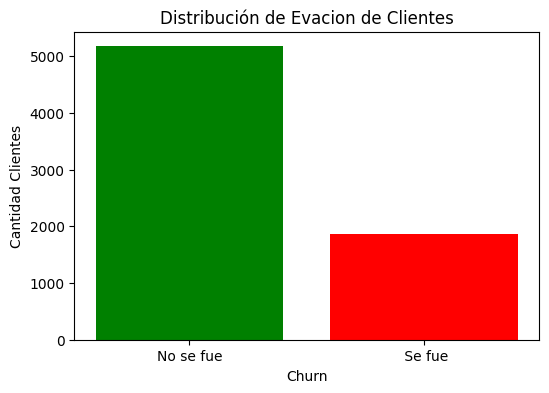

In [59]:
import matplotlib.pyplot as plt

churn_count = datos['Churn'].value_counts()

labels = ['No se fue', ' Se fue']

plt.figure(figsize=(6,4))
plt.bar(labels, churn_count, color=['green', 'red'])
plt.xlabel('Churn')
plt.ylabel('Cantidad Clientes')
plt.title('Distribución de Evacion de Clientes')
plt.show()

In [60]:
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()

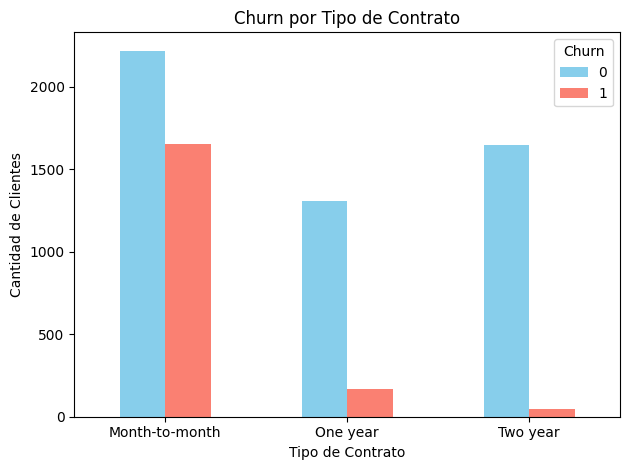

In [61]:
churn_by_contract.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

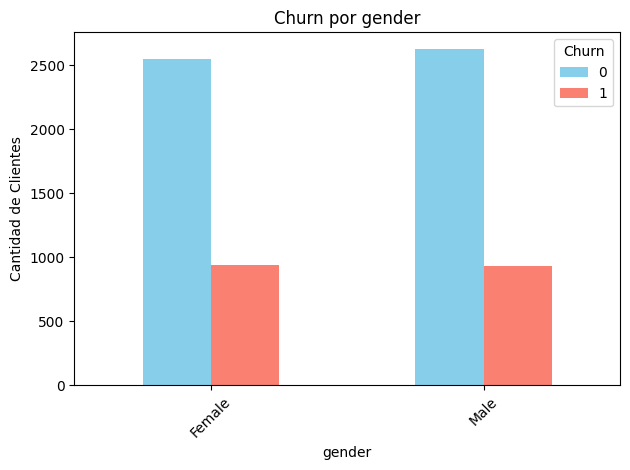

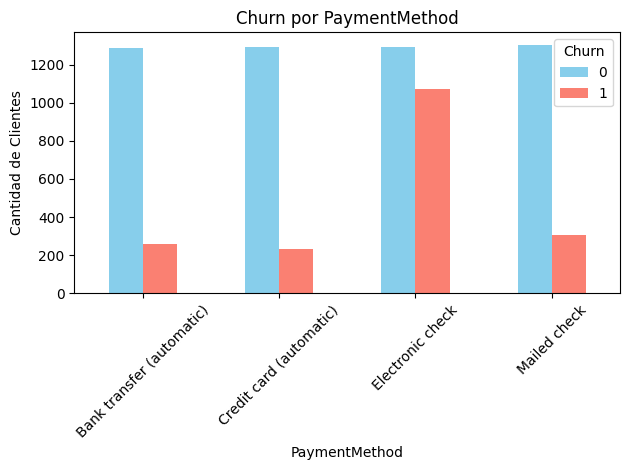

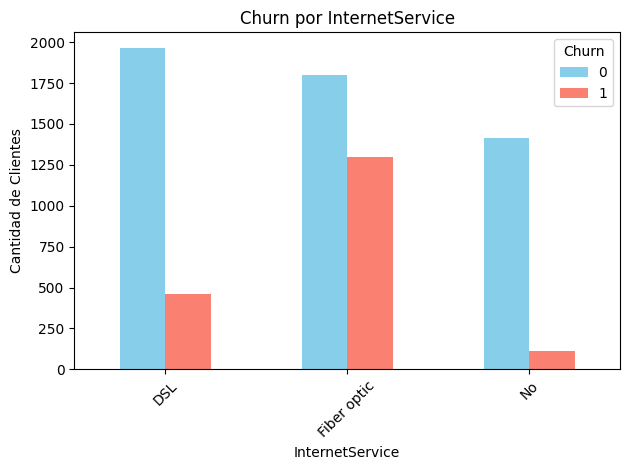

In [62]:
columns = ['gender', 'PaymentMethod', 'InternetService']

for col in columns:
    data = df.groupby([col, 'Churn']).size().unstack()
    data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
    plt.title(f'Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


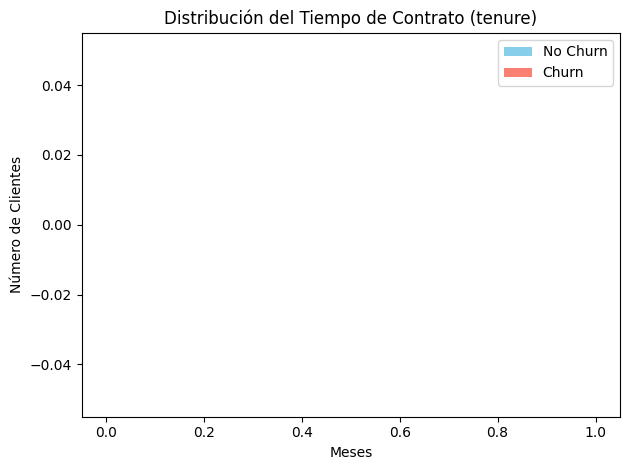

In [67]:
import matplotlib.pyplot as plt

# Convertimos churn a categoría si aún no lo está
df['Churn'] = df['Churn'].astype(str)

# Filtramos por grupos
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']

# Histograma
plt.hist([churn_no, churn_yes], bins=30, stacked=True, label=['No Churn', 'Churn'], color=['skyblue', 'salmon'])
plt.title('Distribución del Tiempo de Contrato (tenure)')
plt.xlabel('Meses')
plt.ylabel('Número de Clientes')
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
df

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,1,...,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,1,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,1,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,0,0,...,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.838333
7039,9992-RRAMN,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,1,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7040,9992-UJOEL,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,1,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [65]:
customer_datos

,gender,SeniorCitizen,Partner,Dependents,meses_contrato,customerID
0,Female,0,1,1,9,0002-ORFBO
1,Male,0,0,0,9,0003-MKNFE
2,Male,0,0,0,4,0004-TLHLJ
3,Male,1,1,0,13,0011-IGKFF
4,Female,1,1,0,3,0013-EXCHZ
...,...,...,...,...,...,...
7038,Female,0,0,0,13,9987-LUTYD
7039,Male,0,1,0,22,9992-RRAMN
7040,Male,0,0,0,2,9992-UJOEL
7041,Male,0,1,1,67,9993-LHIEB


#📄Informe final